In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

Text(0, 0.5, 'Y')

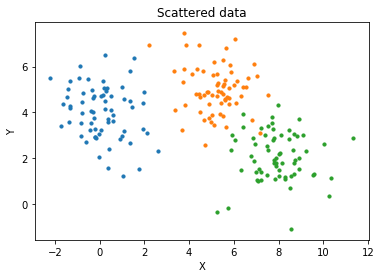

In [2]:
centers = [(0, 4), (5, 5) , (8,2)]
cluster_std = [1.2, 1, 1.1]

X, y= make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=10, label="Cluster3")
plt.title("Scattered data")
plt.xlabel('X')
plt.ylabel('Y')

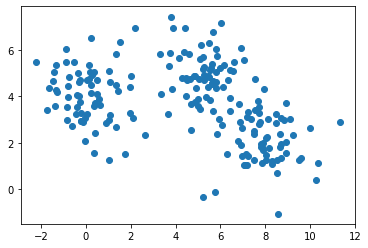

In [3]:
plt.scatter(X[:,0],X[:,1])

# Implementation with stack

In [7]:
def check_core_point(eps,minPts, df, index):
    #get points from given index
    x, y = df.iloc[index]['X']  ,  df.iloc[index]['Y']
    
    #check available points within radius
    temp =  df[((np.abs(x - df['X']) <= eps) & (np.abs(y - df['Y']) <= eps)) & (df.index != index)]
    
    #check how many points are present within radius
    if len(temp) >= minPts:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , True, False, False)
    
    elif (len(temp) < minPts) and len(temp) > 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , False, True, False)
    
    elif len(temp) == 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , False, False, True)

In [73]:
def cluster_with_stack(eps, minPts, df):
    
    #initiating cluster number
    C = 1
    #initiating stacks to maintain
    current_stack = set()
    unvisited = list(df.index)
    clusters = []
    
    
    while (len(unvisited) != 0): #run until all points have been visited

        #identifier for first point of a cluster
        first_point = True
        
        #choose a random unvisited point
        current_stack.add(random.choice(unvisited))
        
        while len(current_stack) != 0: #run until a cluster is complete
            
            #pop current point from stack
            curr_idx = current_stack.pop()
            
            #check if point is core, neighbour or border
            neigh_indexes, iscore, isborder, isnoise = check_core_point(eps, minPts, df, curr_idx)
            
            #dealing with an edge case
            if (isborder & first_point):
                #for first border point, we label it aand its neighbours as noise 
                clusters.append((curr_idx, 0))
                clusters.extend(list(zip(neigh_indexes,[0 for _ in range(len(neigh_indexes))])))
                
                #label as visited
                unvisited.remove(curr_idx)
                unvisited = [e for e in unvisited if e not in neigh_indexes]
    
                continue
                
            unvisited.remove(curr_idx) #remove point from unvisited list
            
            
            neigh_indexes = set(neigh_indexes) & set(unvisited) #look at only unvisited points
            
            if iscore: #if current point is a core
                first_point = False
                
                clusters.append((curr_idx,C)) #assign to a cluster
                current_stack.update(neigh_indexes) #add neighbours to a stack

            elif isborder: #if current point is a border point
                clusters.append((curr_idx,C))
                
                continue

            elif isnoise: #if current point is noise
                clusters.append((curr_idx, 0))
                
                continue
                
        if not first_point:
            #increment cluster number
            C+=1
        
    return clusters
            

In [74]:
#radius of the circle defined as 0.6
eps = 0.6
#minimum neighbouring points set to 3
minPts = 3

In [75]:
data = pd.DataFrame(X, columns = ["X", "Y"] )
clustered = cluster_with_stack(eps, minPts, data)

Unvisited points: 200
Stack {131}
First border point
Unvisited points: 197
Stack {135}
Was core
Stack {32, 164, 69, 75, 108, 109, 172, 15, 180, 86, 118, 30, 63}
Was core
Stack {3, 69, 15, 86, 30, 32, 161, 164, 108, 109, 172, 180, 118, 63}
Was core
Stack {3, 69, 199, 147, 86, 152, 90, 30, 32, 161, 164, 108, 109, 172, 111, 180, 118, 63}
Was core
Stack {191, 66, 3, 69, 199, 86, 152, 90, 30, 159, 32, 161, 164, 108, 109, 172, 111, 44, 180, 118, 122, 190, 63}
Was core
Stack {191, 66, 3, 69, 199, 152, 90, 30, 159, 32, 161, 97, 164, 108, 109, 172, 111, 44, 180, 118, 62, 122, 59, 190, 63}
Was core
Stack {3, 9, 28, 30, 159, 32, 161, 164, 172, 44, 46, 180, 52, 59, 62, 191, 190, 63, 66, 69, 199, 90, 97, 108, 109, 110, 111, 118, 122}
Was core
Stack {3, 9, 30, 159, 32, 161, 164, 36, 172, 44, 46, 180, 52, 186, 59, 62, 191, 190, 63, 66, 69, 199, 90, 97, 108, 109, 110, 111, 118, 122}
Was core
Stack {3, 9, 159, 32, 161, 164, 36, 172, 44, 46, 180, 52, 186, 59, 62, 191, 190, 63, 66, 69, 199, 90, 97, 108, 

Was core
Stack {70, 140, 87, 89, 158, 31, 37, 166, 42, 49, 182, 183, 61}
Was core
Stack {70, 87, 89, 158, 31, 37, 166, 42, 49, 182, 183, 61}
Was core
Stack {70, 14, 89, 158, 31, 37, 166, 42, 106, 49, 117, 182, 183, 121, 61}
Was core
Stack {70, 14, 158, 31, 37, 166, 42, 106, 49, 117, 182, 183, 121, 61}
Was core
Stack {70, 14, 31, 37, 166, 42, 106, 49, 117, 182, 183, 121, 61}
Was core
Stack {70, 14, 37, 166, 42, 106, 175, 49, 117, 182, 183, 121, 61}
Was core
Stack {70, 14, 166, 42, 106, 175, 49, 117, 182, 183, 121, 61}
Was core
Stack {70, 198, 14, 42, 106, 175, 49, 117, 182, 183, 121, 61}
Was core
Stack {70, 198, 14, 106, 175, 49, 117, 182, 183, 121, 61}
Was core
Stack {70, 198, 14, 175, 49, 117, 182, 183, 121, 61}
was border
Stack {70, 198, 14, 49, 117, 182, 183, 121, 61}
Was core
Stack {70, 198, 14, 117, 182, 183, 121, 61}
Was core
Stack {70, 198, 14, 182, 183, 121, 61}
Was core
Stack {70, 198, 14, 183, 121, 61}
Was core
Stack {70, 198, 14, 121, 61}
Was core
Stack {70, 198, 14, 61}
Was

In [77]:
idx , cluster = list(zip(*clustered))

In [78]:
cluster_df = pd.DataFrame(clustered, columns = ["idx", "cluster"])

Text(0, 0.5, 'Y')

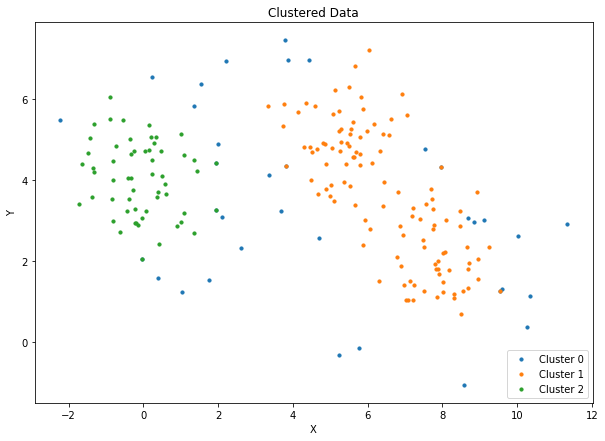

In [79]:
plt.figure(figsize=(10,7))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')


# Clustering with K-Means

In [86]:
from sklearn.cluster import KMeans


In [87]:
clustering = KMeans(3).fit(X)

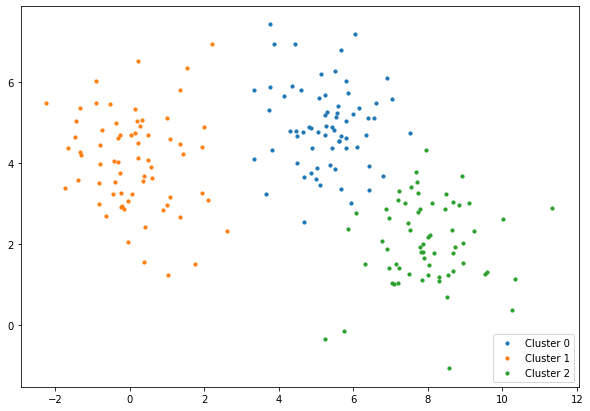

In [88]:
plt.figure(figsize=(10,7))
for clust in np.unique(clustering.labels_):
    plt.scatter(X[clustering.labels_ == clust, 0], X[clustering.labels_ == clust, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(clustering.labels_)], loc ="lower right")